Creamos la conexion a la base de datos de postgres para asi poder hacer las visualizaciones desde la BD

In [3]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Cargar las variables de entorno desde el archivo .env
load_dotenv()

# Variables de entorno
DB_HOST = os.getenv('DB_HOST')
DB_PORT = os.getenv('DB_PORT')
DB_USER = os.getenv('DB_USER')
DB_PASS = os.getenv('DB_PASS')
DB_NAME = os.getenv('DB_NAME')

# Crear la conexión a la base de datos
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

# Consulta para obtener la tabla fusionada
query = "SELECT * FROM spotify_grammys"

# Leer los datos en un DataFrame de pandas
df_merged = pd.read_sql(query, engine)

# Verificar las primeras filas del DataFrame
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_merged.head(5)



,track_id,artists,track_name,popularity,duration_ms,danceability,energy,tempo,track_genre,year,title,category,artist,workers,winner
0,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Say Something,74,229400,0.407,0.147,141.284,acoustic,2014,57th Annual GRAMMY Awards (2014),Best Pop Duo/Group Performance,A Great Big World With Christina Aguilera,unknown worker,True
1,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,Lucky,74,189613,0.625,0.414,130.088,acoustic,2009,52nd Annual GRAMMY Awards (2009),Best Pop Collaboration With Vocals,Jason Mraz & Colbie Caillat,unknown worker,True
2,4ptDJbJl35d7gQfeNteBwp,Dan Berk,Solo,52,198712,0.489,0.314,124.234,acoustic,2001,44th Annual GRAMMY Awards (2001),Best Rock Gospel Album,dc Talk,unknown worker,True
3,2qLMf6TuEC3ruGJg4SMMN6,Jason Mraz;Colbie Caillat,Lucky,68,189613,0.625,0.414,130.088,acoustic,2009,52nd Annual GRAMMY Awards (2009),Best Pop Collaboration With Vocals,Jason Mraz & Colbie Caillat,unknown worker,True
4,5TvE3pk05pyFIGdSY9j4DJ,A Great Big World;Christina Aguilera,Say Something,70,229400,0.407,0.147,141.284,acoustic,2014,57th Annual GRAMMY Awards (2014),Best Pop Duo/Group Performance,A Great Big World With Christina Aguilera,unknown worker,True


Visualizar cómo se distribuye la popularidad de las canciones en el conjunto combinado.

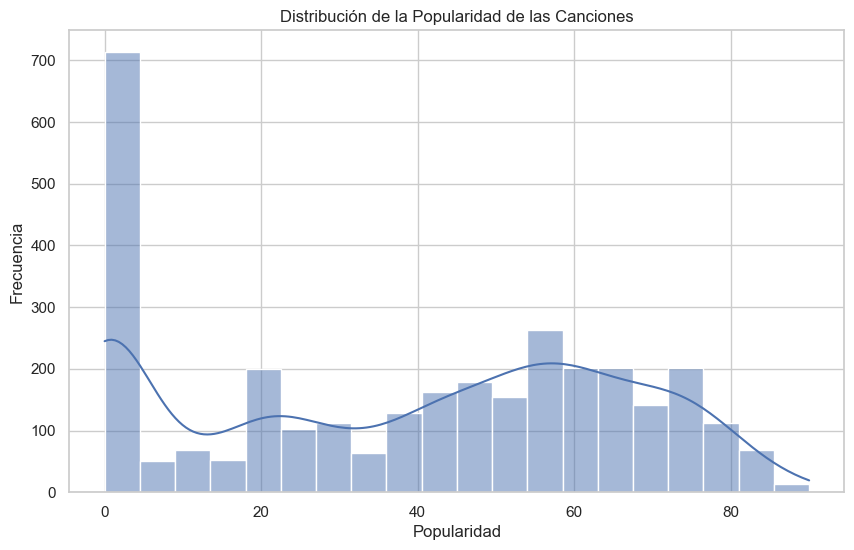

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un histograma de la popularidad de las canciones
plt.figure(figsize=(10,6))
sns.histplot(df_merged['popularity'], bins=20, kde=True)
plt.title('Distribución de la Popularidad de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()


Aqui hacemos un grafico para ver si existe alguna relación entre la duración de las canciones y su popularidad.

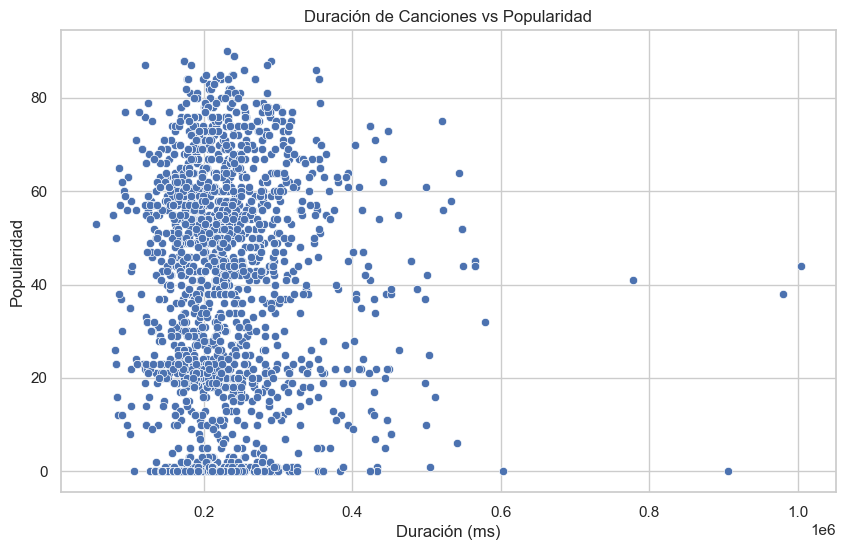

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='duration_ms', y='popularity', data=df_merged)
plt.title('Duración de Canciones vs Popularidad')
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.show()


Nota: Para estas visualizaciones utilizamos las columnas artist (Grammy) o artists (Spotify), según sea el caso. La explicación completa sobre por qué se mantuvieron ambas columnas se encuentra en el notebook de merge.

calculamos la popularidad promedio de los artistas y visualizamos a los más populares. usamos la columna artists (Spotify)

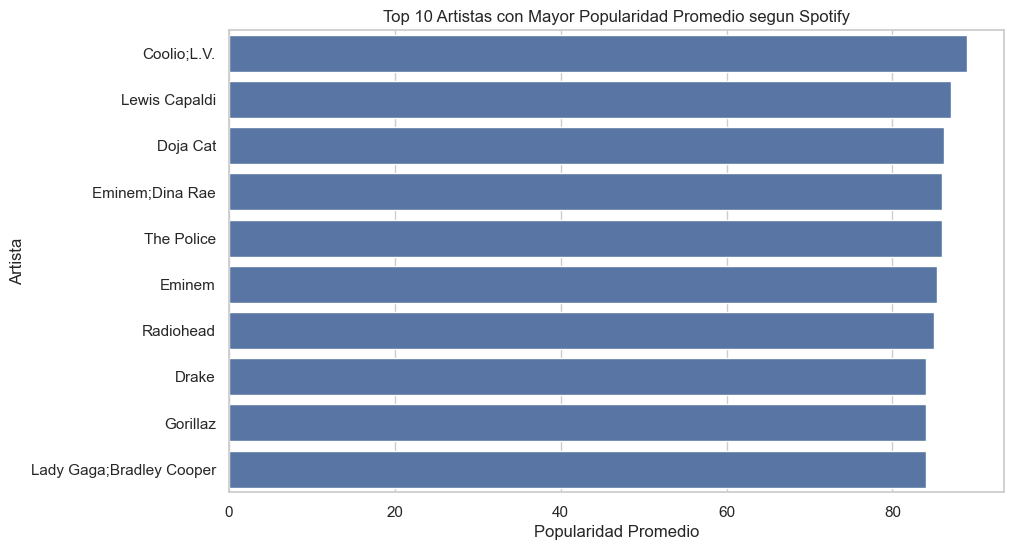

In [73]:
plt.figure(figsize=(10,6))

# Calcular la popularidad promedio por artista
artist_popularity_avg = df_merged.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)

# Crear el gráfico
sns.barplot(x=artist_popularity_avg, y=artist_popularity_avg.index)
plt.title('Top 10 Artistas con Mayor Popularidad Promedio segun Spotify')
plt.xlabel('Popularidad Promedio')
plt.ylabel('Artista')
plt.show()

Nota: Para estas visualizaciones utilizamos las columnas artist (Grammy) o artists (Spotify), según sea el caso. La explicación completa sobre por qué se mantuvieron ambas columnas se encuentra en el notebook de merge.

Hacemos un grafico de barras para visualizar cuales son los 10 artistas con mas premios grammy usando la columna de artist

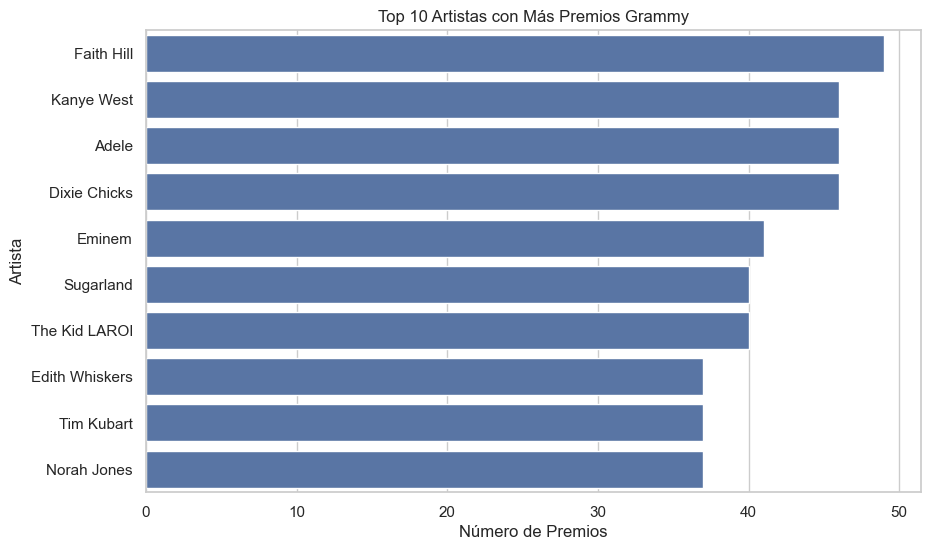

In [28]:
plt.figure(figsize=(10,6))
artist_awards = df_merged['artist'].value_counts().head(10)
sns.barplot(x=artist_awards, y=artist_awards.index)
plt.title('Top 10 Artistas con Más Premios Grammy')
plt.xlabel('Número de Premios')
plt.ylabel('Artista')
plt.show()


Nota: Para estas visualizaciones utilizamos las columnas artist (Grammy) o artists (Spotify), según sea el caso. La explicación completa sobre por qué se mantuvieron ambas columnas se encuentra en el notebook de merge.

Hacemos un graficos de los 10 artistas con mas premios desde el año 2010 usando la columna de artist

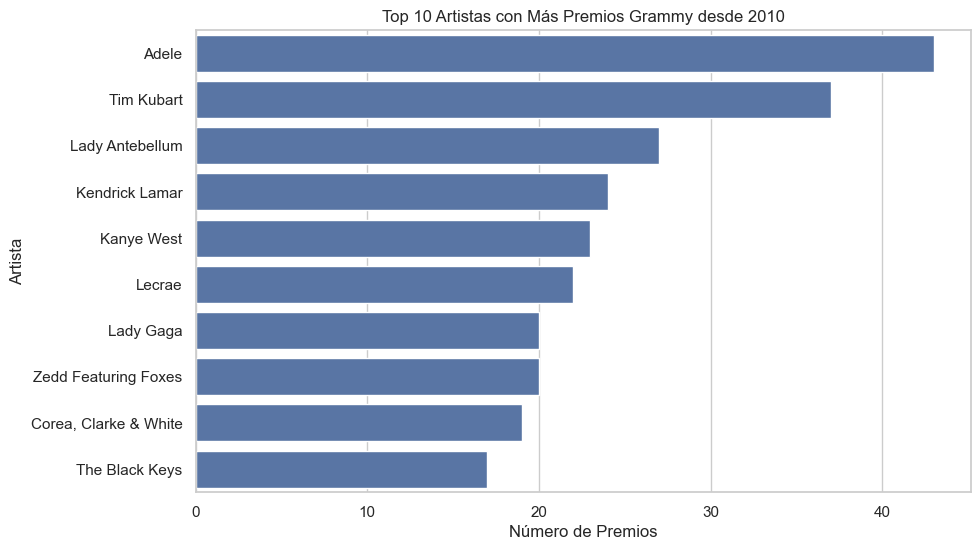

In [31]:
# Filtrar los datos para incluir solo los años desde 2010
df_recent_awards = df_merged[df_merged['year'] >= 2010]

# Contar los artistas con más premios desde 2010
artist_awards_recent = df_recent_awards['artist'].value_counts().head(10)

# Crear el gráfico de barras para los artistas con más premios desde 2010
plt.figure(figsize=(10,6))
sns.barplot(x=artist_awards_recent, y=artist_awards_recent.index)
plt.title('Top 10 Artistas con Más Premios Grammy desde 2010')
plt.xlabel('Número de Premios')
plt.ylabel('Artista')
plt.show()


hacemos una comparacion de que tan populares son ciertos generos de musica en diferentes graficos

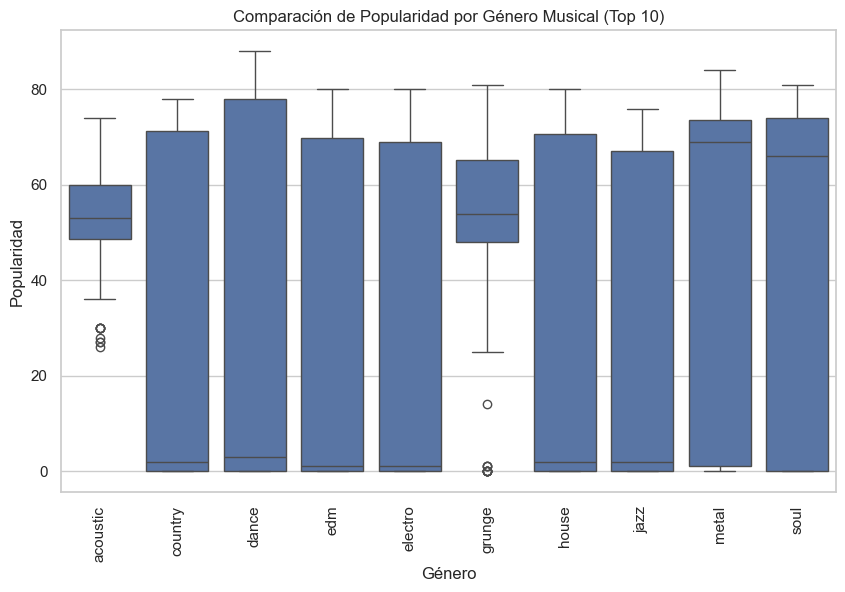

In [11]:
# Contar los géneros más comunes
top_10_genres = df_merged['track_genre'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo los géneros en el top 10
df_top_10_genres = df_merged[df_merged['track_genre'].isin(top_10_genres)]

# Crear el gráfico
plt.figure(figsize=(10,6))
sns.boxplot(x='track_genre', y='popularity', data=df_top_10_genres)
plt.xticks(rotation=90)
plt.title('Comparación de Popularidad por Género Musical (Top 10)')
plt.xlabel('Género')
plt.ylabel('Popularidad')
plt.show()



Aqui filtramos los top 5 generos con mas datos, osea los generos mas concurrentes en el dataset

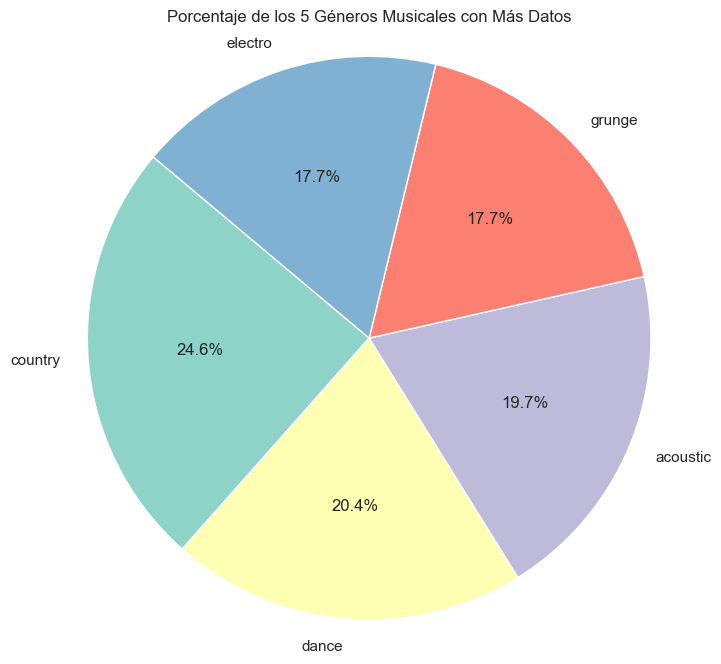

In [12]:
# Contar los géneros más comunes
top_5_genres = df_merged['track_genre'].value_counts().nlargest(5)

# Crear el gráfico de pastel
plt.figure(figsize=(8,8))
plt.pie(top_5_genres, labels=top_5_genres.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Porcentaje de los 5 Géneros Musicales con Más Datos')
plt.axis('equal')  # Asegura que el gráfico sea un círculo.
plt.show()


Hacemos un grafico con el top 10 años que mas se entregaron premios grammy

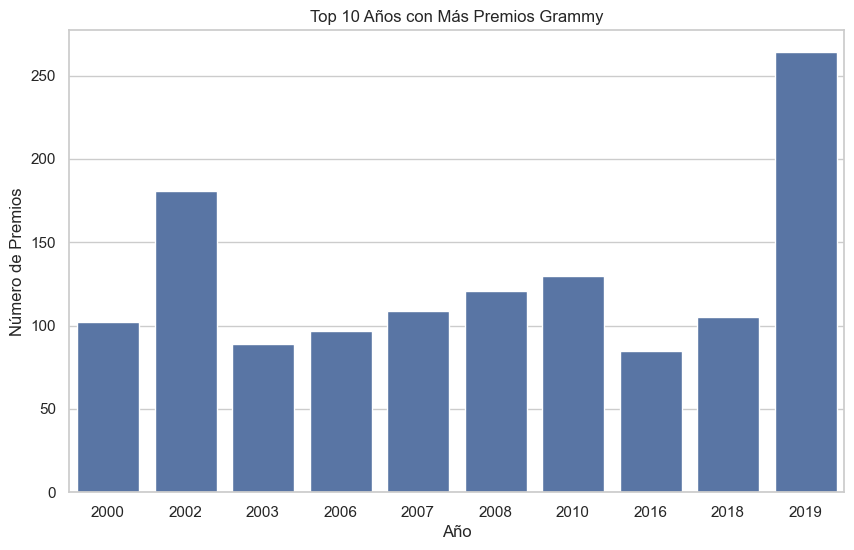

In [15]:
plt.figure(figsize=(10,6))
top_years = df_merged['year'].value_counts().head(10)
sns.barplot(x=top_years.index, y=top_years.values)
plt.title('Top 10 Años con Más Premios Grammy')
plt.xlabel('Año')
plt.ylabel('Número de Premios')
plt.show()


Nota: Para estas visualizaciones utilizamos las columnas artist (Grammy) o artists (Spotify), según sea el caso. La explicación completa sobre por qué se mantuvieron ambas columnas se encuentra en el notebook de merge.

Hacemos un grafico con las canciones con mas energia junto a su artista usando la columna de artists de spotify

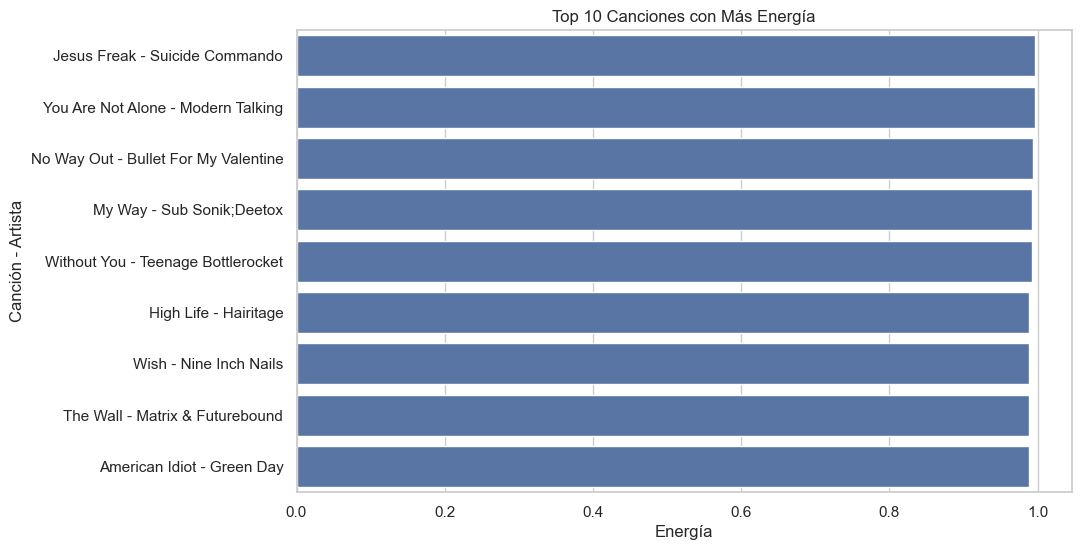

In [50]:
plt.figure(figsize=(10,6))

# Combinar track_name y artists en una sola columna para mostrar ambos en el gráfico
df_merged['track_artist'] = df_merged['track_name'] + ' - ' + df_merged['artists']

# Seleccionar las canciones con más energía
top_energy_songs = df_merged[['track_artist', 'energy']].sort_values(by='energy', ascending=False).head(10)

# Crear el gráfico
sns.barplot(x='energy', y='track_artist', data=top_energy_songs)
plt.title('Top 10 Canciones con Más Energía')
plt.xlabel('Energía')
plt.ylabel('Canción - Artista')
plt.show()


Nota: Para estas visualizaciones utilizamos las columnas artist (Grammy) o artists (Spotify), según sea el caso. La explicación completa sobre por qué se mantuvieron ambas columnas se encuentra en el notebook de merge.

Hacemos una grafica de barras para ver el top 10 de artistas con mas energia en sus canciones, donde sumamos la energía de todas las canciones de cada artista, usando la columna artist (Grammy)

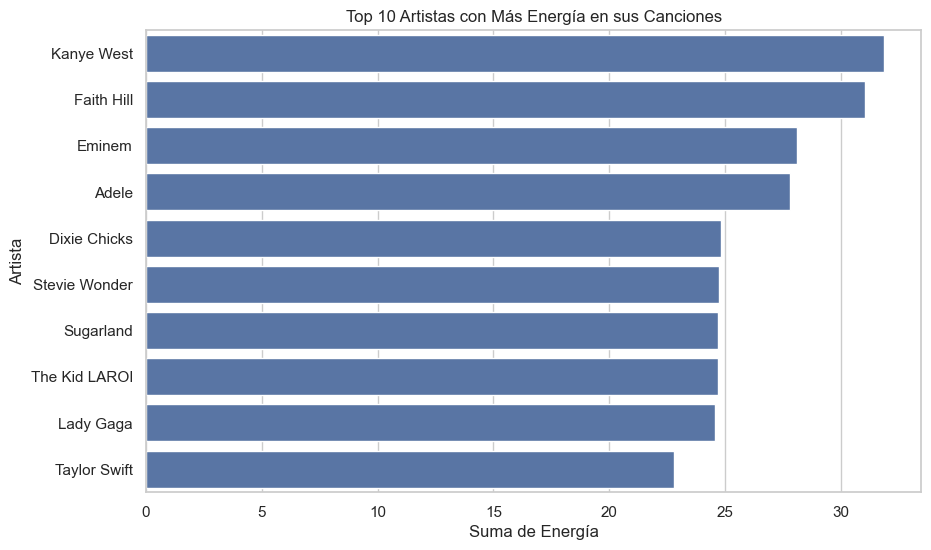

In [52]:
plt.figure(figsize=(10,6))
top_energy_artists = df_merged.groupby('artist')['energy'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_energy_artists.values, y=top_energy_artists.index)
plt.title('Top 10 Artistas con Más Energía en sus Canciones')
plt.xlabel('Suma de Energía')
plt.ylabel('Artista')
plt.show()


Nota: Para estas visualizaciones utilizamos las columnas artist (Grammy) o artists (Spotify), según sea el caso. La explicación completa sobre por qué se mantuvieron ambas columnas se encuentra en el notebook de merge.

Hacemos la comparacion de la grafica anterior de artistas con mas energia,esta vez usando la columna artists (Spotify)

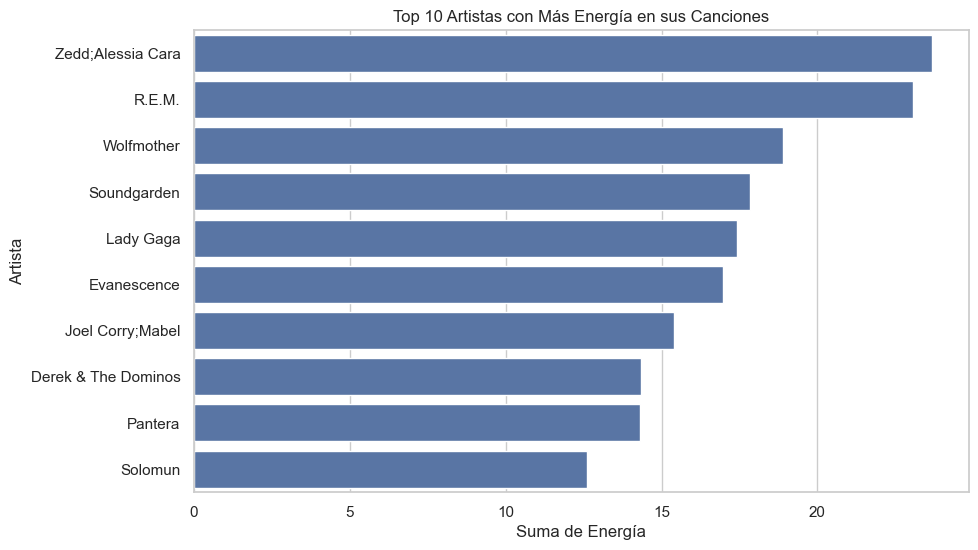

In [53]:
plt.figure(figsize=(10,6))
top_energy_artists = df_merged.groupby('artists')['energy'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_energy_artists.values, y=top_energy_artists.index)
plt.title('Top 10 Artistas con Más Energía en sus Canciones')
plt.xlabel('Suma de Energía')
plt.ylabel('Artista')
plt.show()


Hacemos dos gráficos: un gráfico de barras y un gráfico circular para mostrar la distribución de las categorías de premios, esto nos dara informacion sobre las categorias que mas se ven en los premios grammys.

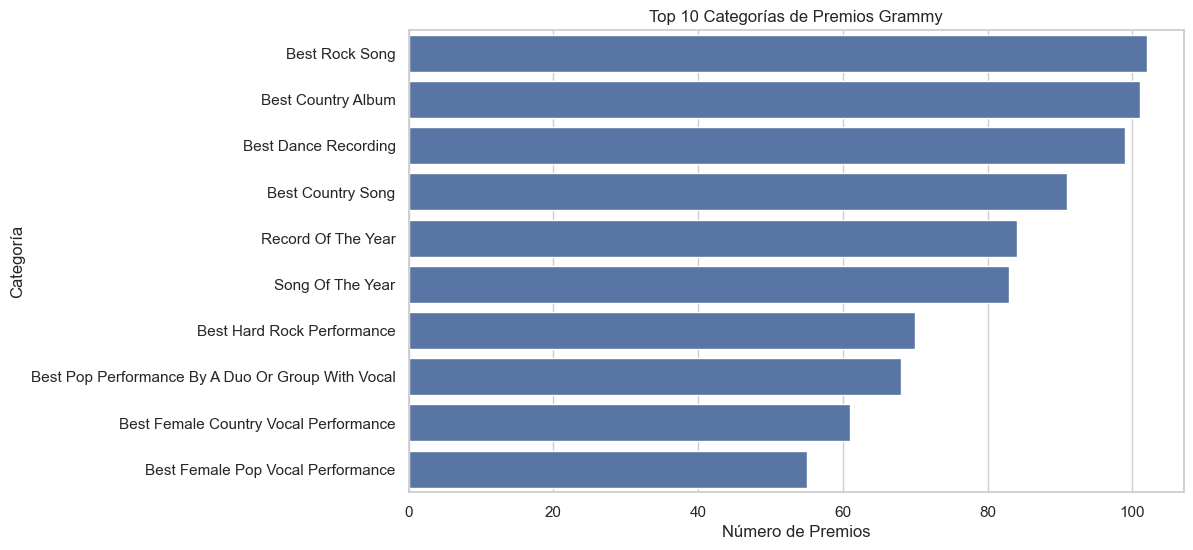

In [18]:
plt.figure(figsize=(10,6))
category_counts = df_merged['category'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 10 Categorías de Premios Grammy')
plt.xlabel('Número de Premios')
plt.ylabel('Categoría')
plt.show()


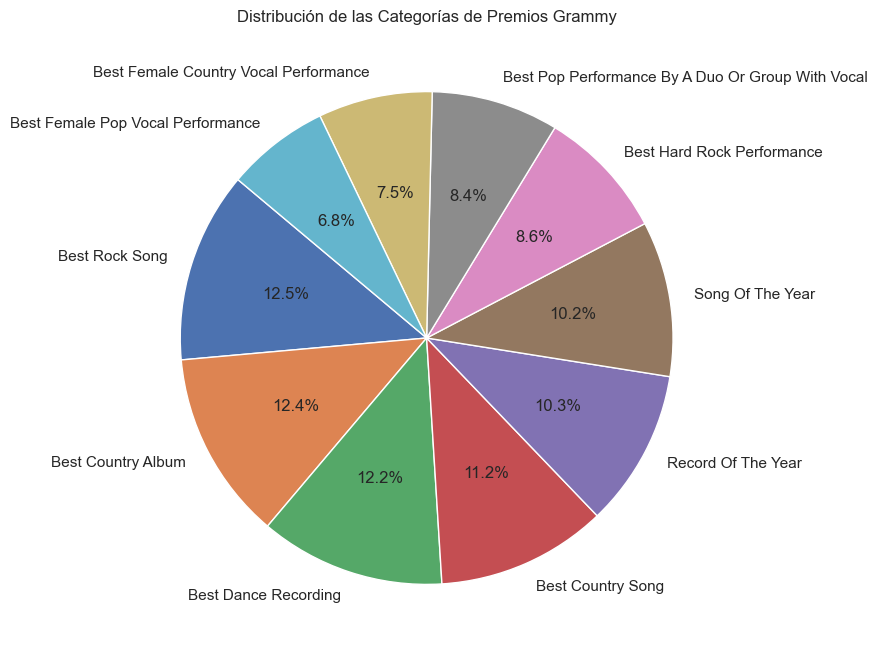

In [19]:
plt.figure(figsize=(8,8))
category_pie = df_merged['category'].value_counts().head(10)
plt.pie(category_pie.values, labels=category_pie.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de las Categorías de Premios Grammy')
plt.show()


Hacemos un grafico donde mostramos un top canciones con mas danceability

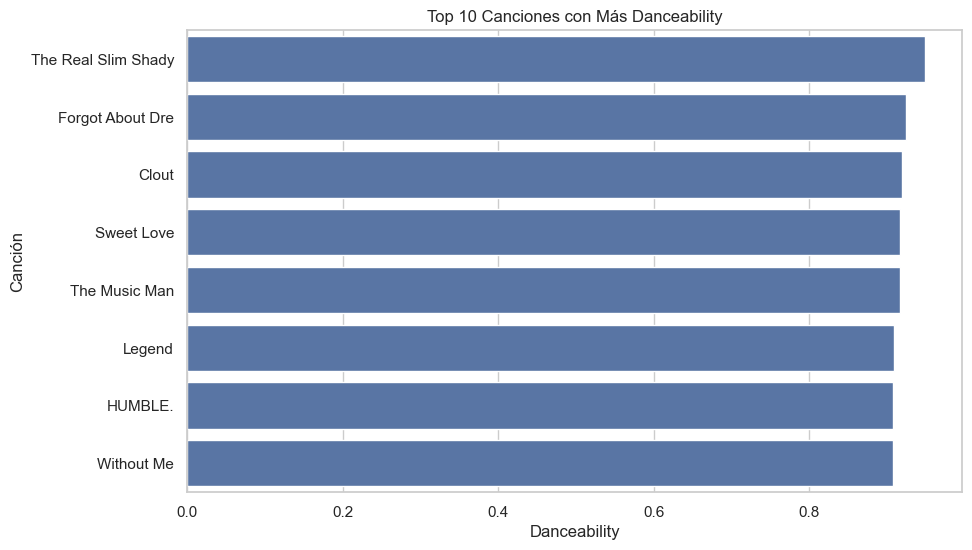

In [20]:
plt.figure(figsize=(10,6))
top_danceability_songs = df_merged[['track_name', 'danceability']].sort_values(by='danceability', ascending=False).head(10)
sns.barplot(x='danceability', y='track_name', data=top_danceability_songs)
plt.title('Top 10 Canciones con Más Danceability')
plt.xlabel('Danceability')
plt.ylabel('Canción')
plt.show()


Nota: Para estas visualizaciones utilizamos las columnas artist (Grammy) o artists (Spotify), según sea el caso. La explicación completa sobre por qué se mantuvieron ambas columnas se encuentra en el notebook de merge.

Visualizamos los 10 artistas con mas canciones en el dataset, usamos la columna artist (grammy)

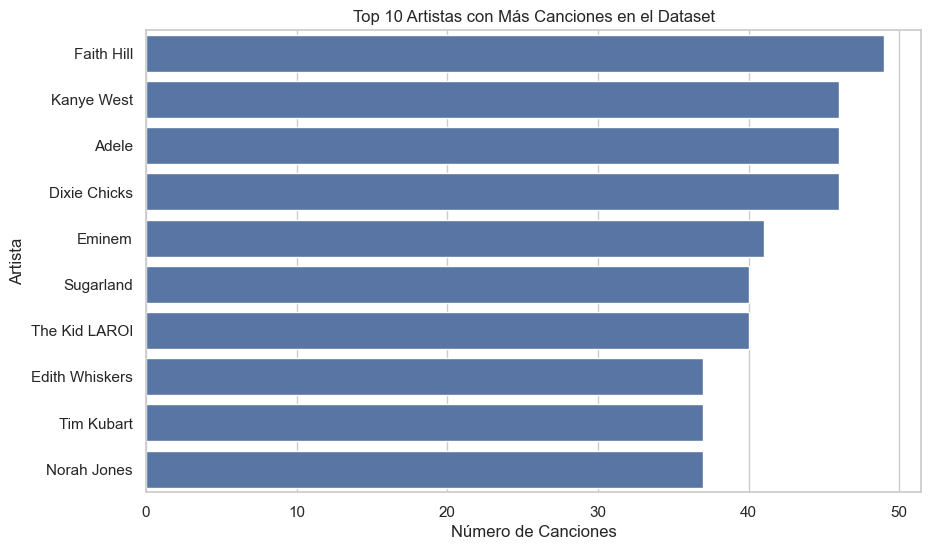

In [24]:
plt.figure(figsize=(10,6))
top_artists_songs = df_merged['artist'].value_counts().head(10)
sns.barplot(x=top_artists_songs.values, y=top_artists_songs.index)
plt.title('Top 10 Artistas con Más Canciones en el Dataset')
plt.xlabel('Número de Canciones')
plt.ylabel('Artista')
plt.show()


Nota: Para estas visualizaciones utilizamos las columnas artist (Grammy) o artists (Spotify), según sea el caso. La explicación completa sobre por qué se mantuvieron ambas columnas se encuentra en el notebook de merge.

Hacemos la misma visualizacion de los 10 artistas con mas canciones en el dataset, pero esta vez usando la columna artists (spotify) para ver la comparacion entre visualzaciones

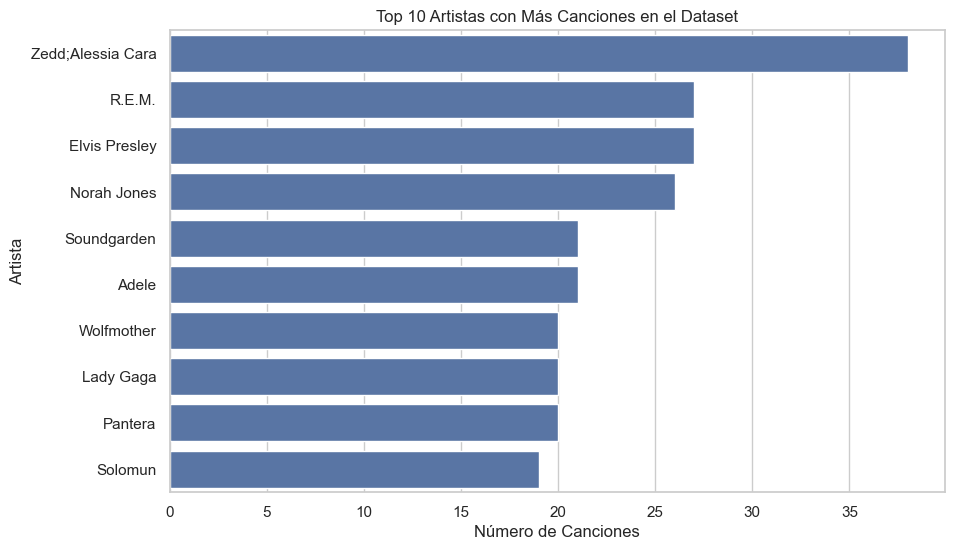

In [54]:
plt.figure(figsize=(10,6))
top_artists_songs = df_merged['artists'].value_counts().head(10)
sns.barplot(x=top_artists_songs.values, y=top_artists_songs.index)
plt.title('Top 10 Artistas con Más Canciones en el Dataset')
plt.xlabel('Número de Canciones')
plt.ylabel('Artista')
plt.show()


Graficamos cuales canciones son las que mas tienen durabilidad junto con el artista correspondiente

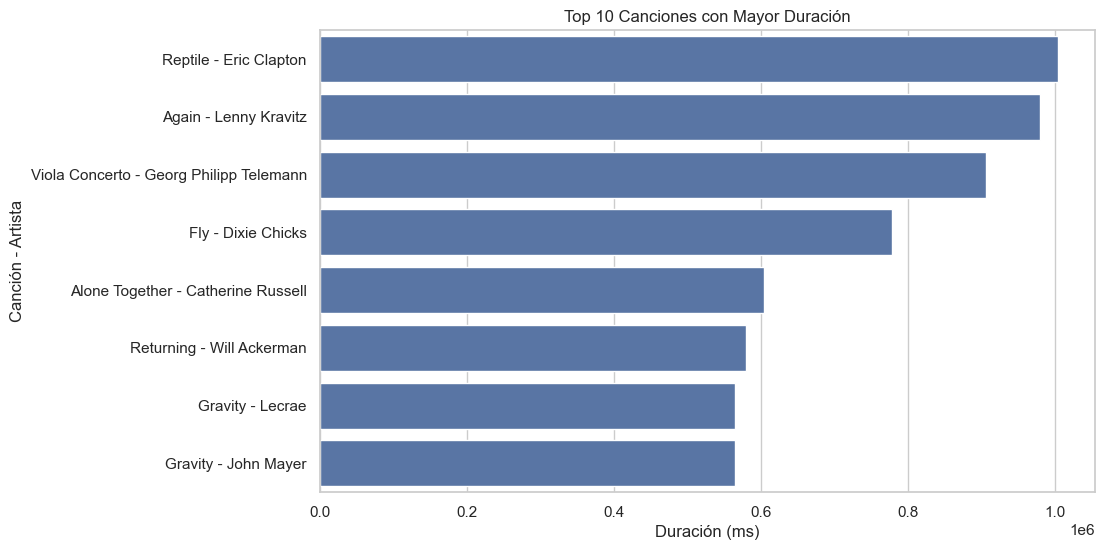

In [56]:
plt.figure(figsize=(10,6))

# Crear una columna que combine 'track_name' y 'artist'
df_merged['track_artist'] = df_merged['track_name'] + ' - ' + df_merged['artist']

# Obtener las 10 canciones con mayor duración, incluyendo el artista
top_duration_songs = df_merged[['track_artist', 'duration_ms']].sort_values(by='duration_ms', ascending=False).head(10)

# Crear el gráfico de barras
sns.barplot(x='duration_ms', y='track_artist', data=top_duration_songs)
plt.title('Top 10 Canciones con Mayor Duración')
plt.xlabel('Duración (ms)')
plt.ylabel('Canción - Artista')
plt.show()


Visualizamos un top 10 de los años que mas canciones hay en todo el dataset

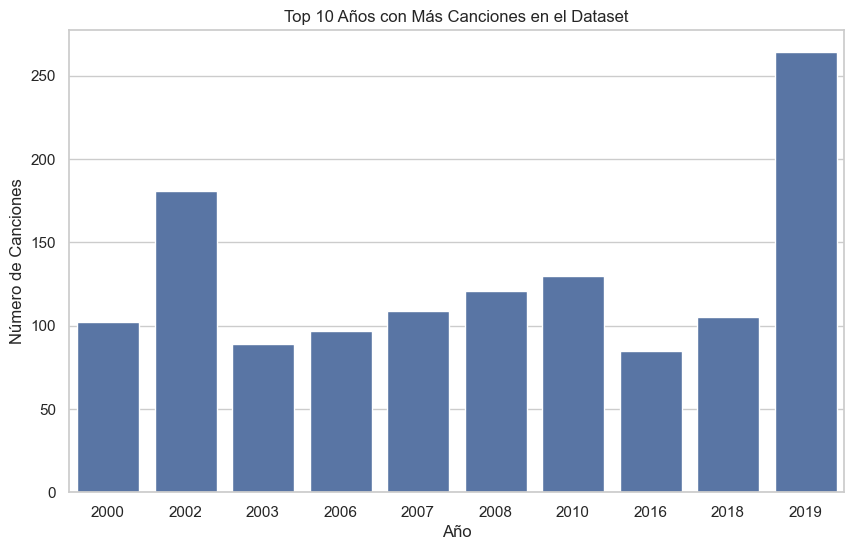

In [35]:
plt.figure(figsize=(10,6))
total_songs_year = df_merged['year'].value_counts().head(10)
sns.barplot(x=total_songs_year.index, y=total_songs_year.values)
plt.title('Top 10 Años con Más Canciones en el Dataset')
plt.xlabel('Año')
plt.ylabel('Número de Canciones')
plt.show()


Como sabemos una cancion puede tener multiples nominaciones, entonces visualizaremos cuales son las canciones que mas nominaciones han tenido junto con su artista correspondiente

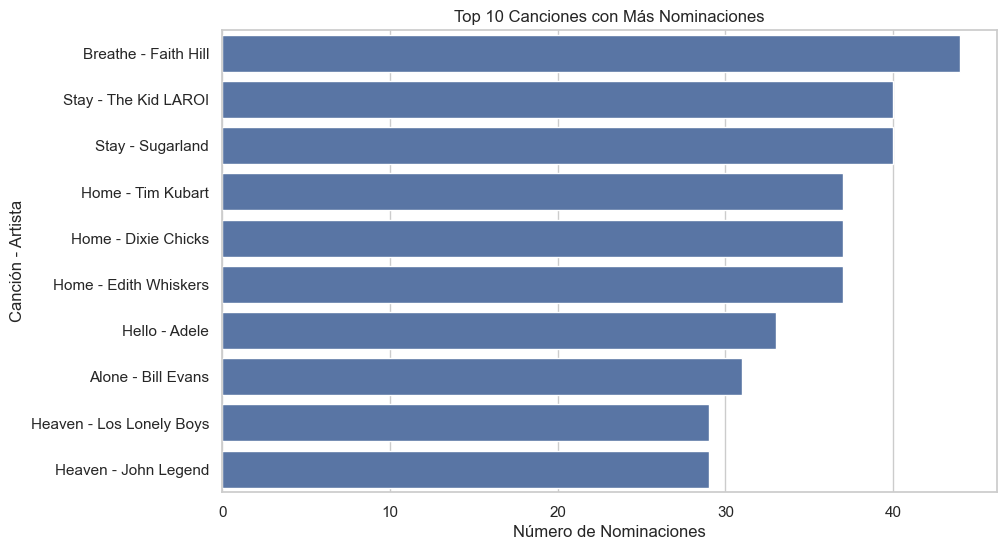

In [40]:
plt.figure(figsize=(10,6))

# Crear una columna que combine 'track_name' y 'artist'
df_merged['track_artist'] = df_merged['track_name'] + ' - ' + df_merged['artist']

# Contar las nominaciones basadas en 'track_artist'
top_nominations = df_merged['track_artist'].value_counts().head(10)

# Crear el gráfico de barras
sns.barplot(x=top_nominations.values, y=top_nominations.index)
plt.title('Top 10 Canciones con Más Nominaciones')
plt.xlabel('Número de Nominaciones')
plt.ylabel('Canción - Artista')
plt.show()


Nota: Para estas visualizaciones utilizamos las columnas artist (Grammy) o artists (Spotify), según sea el caso. La explicación completa sobre por qué se mantuvieron ambas columnas se encuentra en el notebook de merge.

Hacemos un grafico para ver la evolucion de un artista a tra vez de los años basandonos en su popularidad, haremos una comparacion entre las columnas artist (Grammy) y artists (Spotify) donde primero veremos la evolucion de eminem a traves de los años segun su poularidad basado en Spotify que refleja el gusto del público en plataformas digitales.

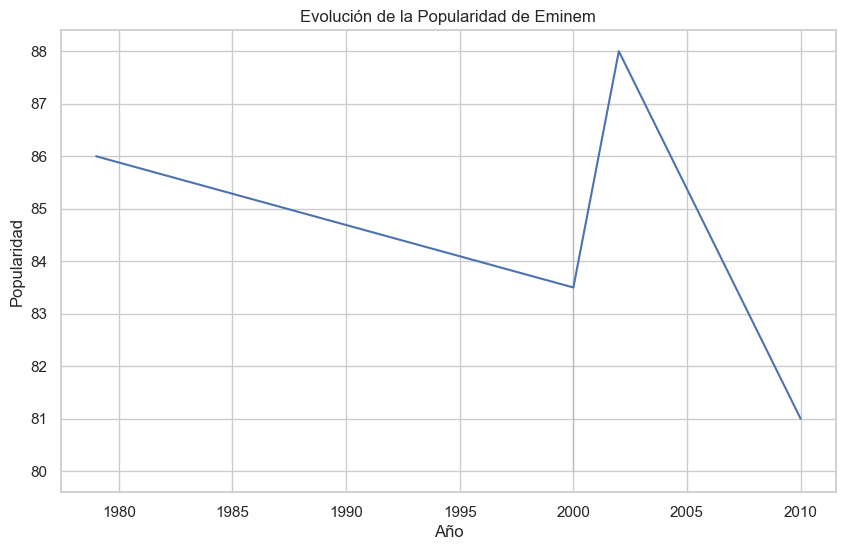

In [71]:
plt.figure(figsize=(10,6))

# Filtrar un artista específico (ejemplo: 'Adele')
artist_name = 'Eminem'
artist_data = df_merged[df_merged['artists'].str.contains(artist_name)]

# Crear el gráfico de líneas para ver la popularidad de las canciones del artista a lo largo del tiempo
sns.lineplot(x='year', y='popularity', data=artist_data)
plt.title(f'Evolución de la Popularidad de {artist_name}')
plt.xlabel('Año')
plt.ylabel('Popularidad')
plt.show()


Ahora haremos lo mismo pero con la columna artist(Grammy) lo cual refleja el reconocimiento en el contexto de la industria musical formal.

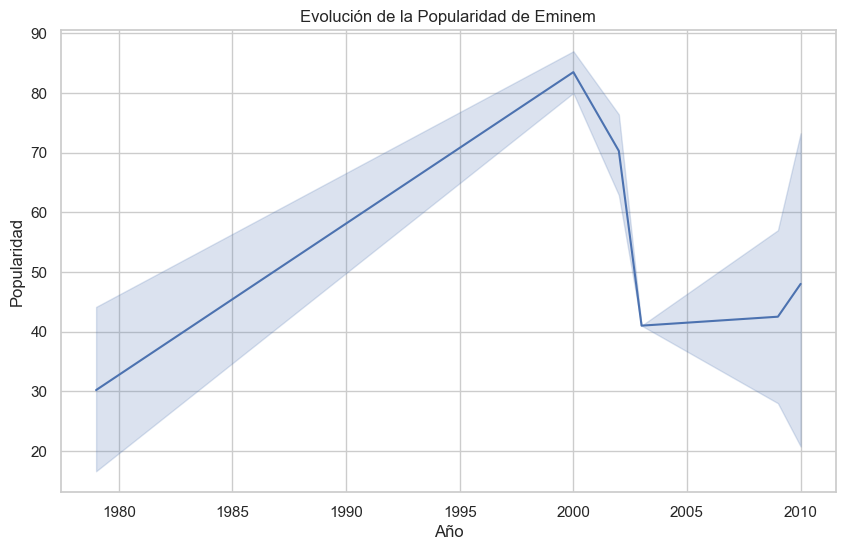

In [72]:
plt.figure(figsize=(10,6))

# Filtrar un artista específico (ejemplo: 'Adele')
artist_name = 'Eminem'
artist_data = df_merged[df_merged['artist'].str.contains(artist_name)]

# Crear el gráfico de líneas para ver la popularidad de las canciones del artista a lo largo del tiempo
sns.lineplot(x='year', y='popularity', data=artist_data)
plt.title(f'Evolución de la Popularidad de {artist_name}')
plt.xlabel('Año')
plt.ylabel('Popularidad')
plt.show()


Nota: Para estas visualizaciones utilizamos las columnas artist (Grammy) y artists (Spotify). La explicación completa sobre por qué se mantuvieron ambas columnas se encuentra en el notebook de merge.

Por ultimo hacemos una comparacion de apariciones entre los artistas en premios grammy y canciones de spotify 

¿Por qué sería útil mostrar esta comparación?

Los Grammy premian logros según criterios de la industria, mientras que Spotify refleja la popularidad entre el público general. Compararlos nos permite ver si los artistas más reconocidos en términos de premios son también populares en plataformas de streaming.

Evolución Diferente: Podriamos descubrir que un artista puede ser muy premiado, pero no necesariamente popular en términos de reproducciones o viceversa. Mostrar ambas perspectivas revela qué tan alineados o divergentes están los gustos del público y las instituciones.

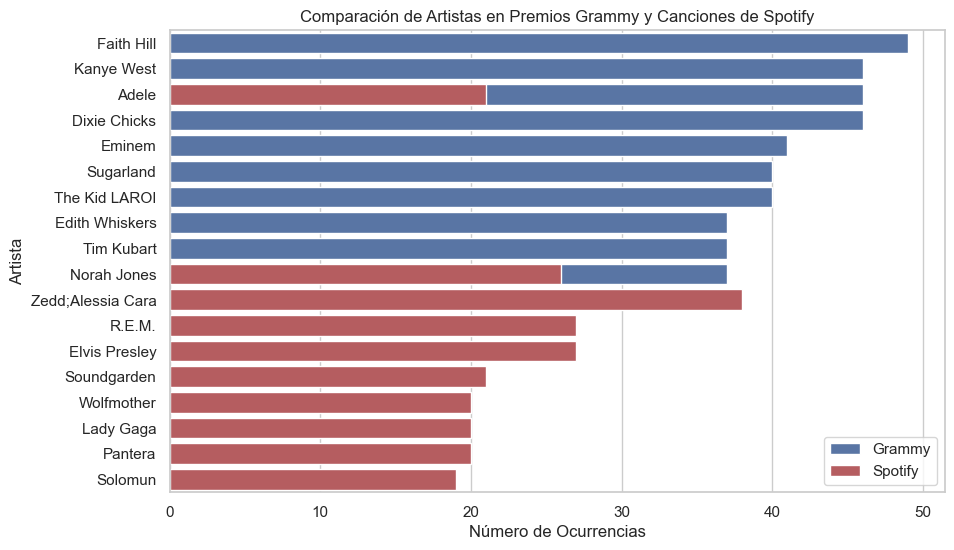

In [44]:
plt.figure(figsize=(10,6))
artist_grammy_count = df_merged['artist'].value_counts().head(10)
artists_spotify_count = df_merged['artists'].value_counts().head(10)

# Comparar ambas columnas
sns.barplot(x=artist_grammy_count.values, y=artist_grammy_count.index, color="b", label="Grammy")
sns.barplot(x=artists_spotify_count.values, y=artists_spotify_count.index, color="r", label="Spotify")
plt.title('Comparación de Artistas en Premios Grammy y Canciones de Spotify')
plt.xlabel('Número de Ocurrencias')
plt.ylabel('Artista')
plt.legend()
plt.show()
